In [1]:
# Indivíduo modelo

coeffs={
    'A': {
        'A': {'n': 24.359481567723428, 'k': 1.6230487104412776}, 
        'B': {'n': 8.813093742430754, 'k': 1.0582389482943708}, 
        'D': {'n': 7.300033283308039, 'k': 1.9500959426301654}, 
        'tau': 2.6100326485283145
        }, 
    'B': {
        'C': {'n': 2.685381856961304, 'k': 0.3774363311613684}, 
        'D': {'n': 14.352590412986668, 'k': 0.3341776341957746}, 
        'tau': 3.9588668046291393
        }, 
    'C': {
        'A': {'n': 0.3194527547024098, 'k': 1.9084819726101825}, 
        'D': {'n': 28.52750531104773, 'k': 0.35778636980868167}, 
        'tau': 4.831063955192538
        }, 
    'D': {
        'A': {'n': 26.772700065284713, 'k': 0.9748525323386317}, 
        'D': {'n': 21.044938430094405, 'k': 0.1000936942714131}, 
        'tau': 0.8239226659903076
        }
    }

c:\Users\anabi\OneDrive\Documentos\# BOLSA GRN\Códigos\BOLSA-GRN\PythonCode\Modules\Helpers.py:27: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  df = pd.read_csv(filename, delim_whitespace=True, header=None, names=['t'] + labels)


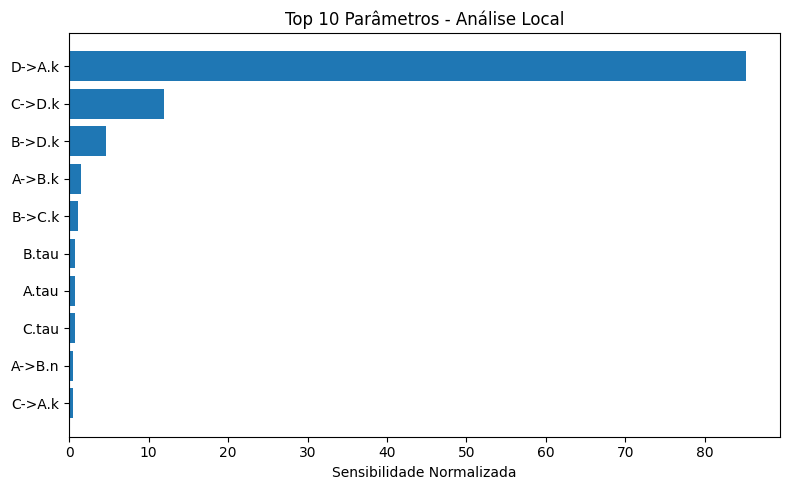

[INFO] Executando análise de Morris com 345 amostras...


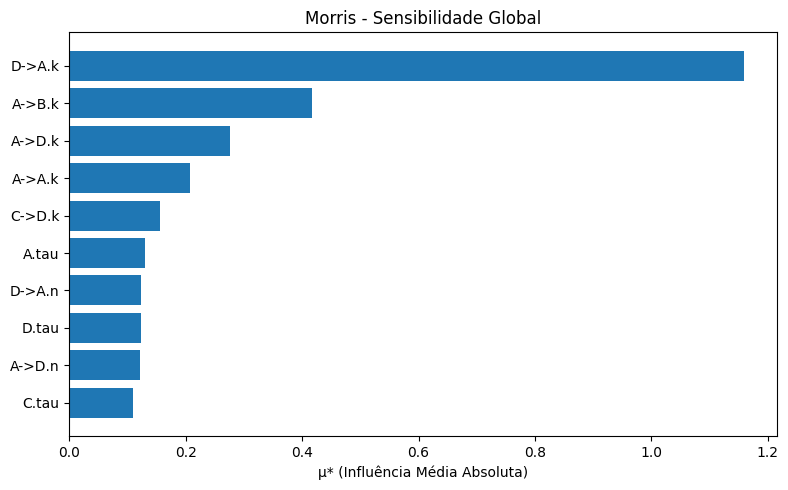

[INFO] Gerando 22 parâmetros e 1024 amostras (second_order=True)...


c:\Users\anabi\OneDrive\Documentos\# BOLSA GRN\Códigos\BOLSA-GRN\PythonCode\Modules\Equations.py:12: RuntimeWarning: invalid value encountered in scalar power
  result = (val**nval / (val**nval + kval**nval))
C:\Users\anabi\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\scipy\integrate\_ode.py:1348: UserWarning: lsoda: Excess accuracy requested (tolerances too small).
  warnings.warn('{:s}: {:s}'.format(self.__class__.__name__,


[INFO] Calculando índices de Sobol...


C:\Users\anabi\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\SALib\util\__init__.py:274: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  names = list(pd.unique(groups))



=== Resultados da Análise de Sobol ===
A->A.n                    | S1=0.0000 | ST=0.0000
A->A.k                    | S1=0.0000 | ST=0.0000
A->B.n                    | S1=-0.0000 | ST=0.0000
A->B.k                    | S1=0.0000 | ST=0.0000
A->D.n                    | S1=-0.0000 | ST=0.0000
A->D.k                    | S1=0.0000 | ST=0.0000
A.tau                     | S1=-0.0000 | ST=0.0000
B->C.n                    | S1=-0.0000 | ST=0.0000
B->C.k                    | S1=0.0000 | ST=0.0000
B->D.n                    | S1=0.0000 | ST=0.0000
B->D.k                    | S1=-0.0000 | ST=0.0000
B.tau                     | S1=0.0000 | ST=0.0000
C->A.n                    | S1=0.0000 | ST=0.0000
C->A.k                    | S1=-0.0000 | ST=0.0000
C->D.n                    | S1=0.0000 | ST=0.0000
C->D.k                    | S1=-0.0000 | ST=0.0878
C.tau                     | S1=0.0000 | ST=0.0000
D->A.n                    | S1=0.0000 | ST=0.0000
D->A.k                    | S1=0.0000 | ST=0.0000
D->

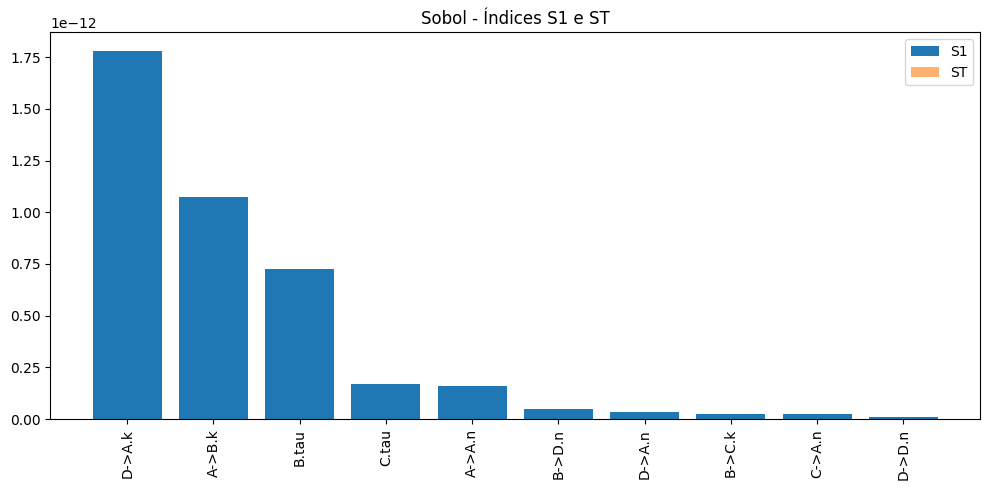

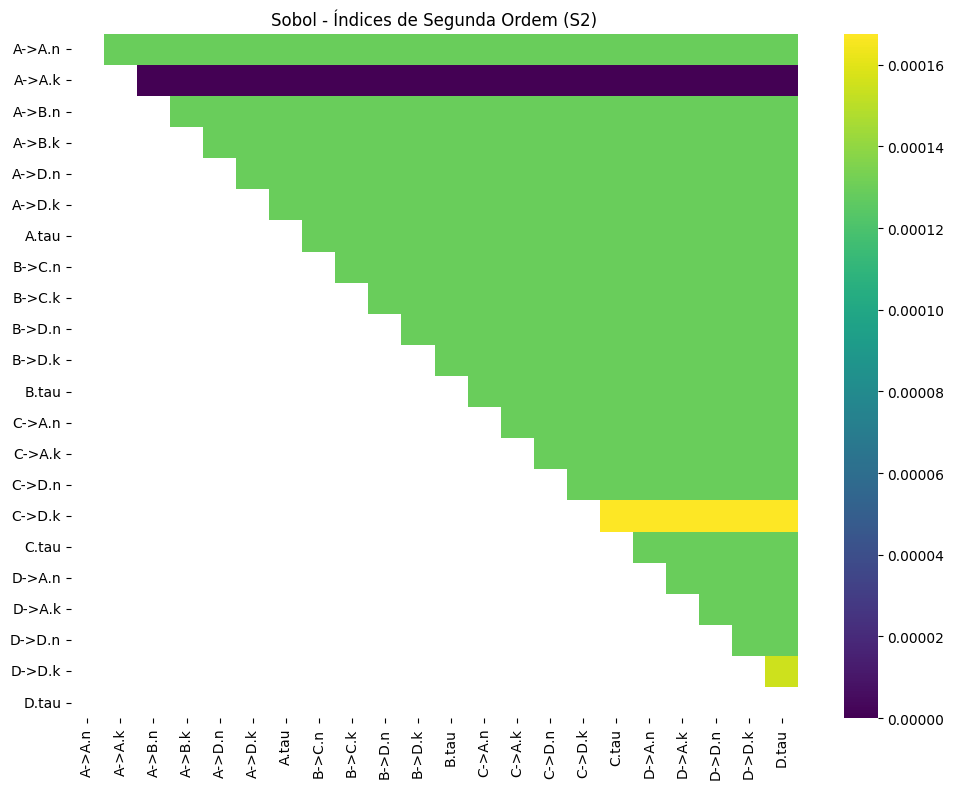

In [ ]:
import sys
import os
sys.path.append(os.path.abspath("../..")) 

from Modules.Models import ModelWrapper
from Modules.Sensitivity import SensitivityAnalyzer

model = ModelWrapper.ABCD()
analyzer = SensitivityAnalyzer(model)
best_params = coeffs

# Análise local
local_results = analyzer.local_sensitivity(best_params)
analyzer.plot_local(local_results)

# Aanálise de Morris
morris_results = analyzer.morris_sensitivity(best_params, num_trajectories=15)
analyzer.plot_global(morris_results, method="morris")

# Análise de Sobol
sobol_results = analyzer.sobol_sensitivity(best_params, N=2048, second_order=True)
problem = analyzer._build_problem(best_params)
analyzer.plot_global(sobol_results, method="sobol")

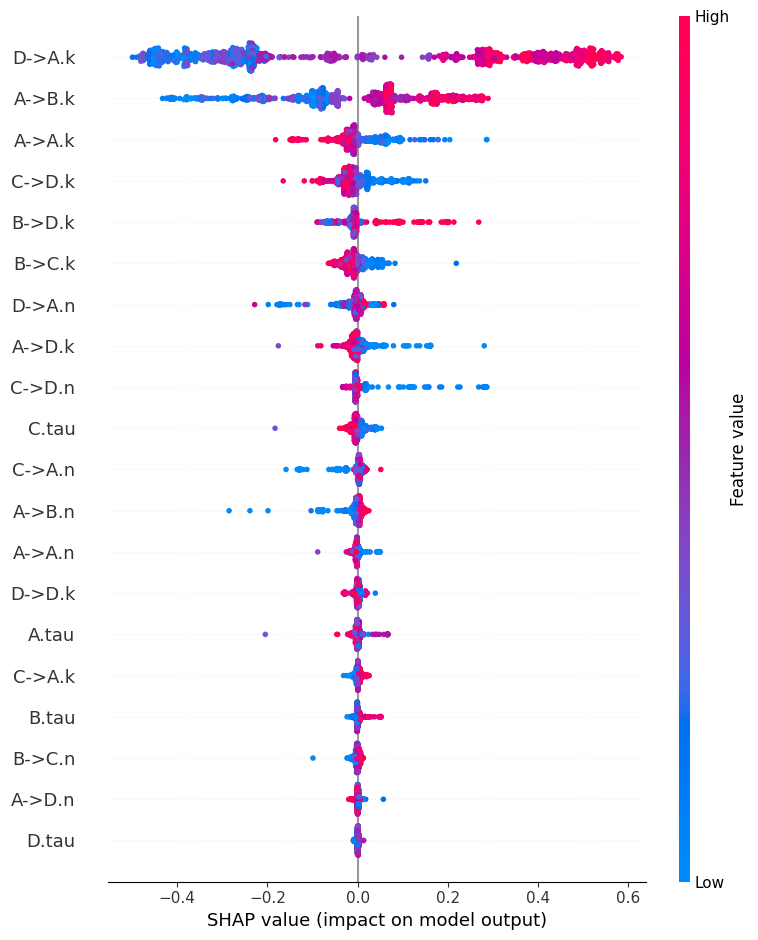

In [ ]:
# SHAP – Análise de Importância Global
shap_values = analyzer.shap_sensitivity(best_params, N=64)
analyzer.plot_shap_summary()
